## Analisis Descriptivo

In [29]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od
import missingno as msno

- En este caso vamos a trabajar con datos de kaggle asi que lo descargamos de kaggle, con nuestars credenciales

In [ ]:
dataset = 'https://www.kaggle.com/brendan45774/countries-life-expectancy'
od.download(dataset)

In [24]:
data = pd.read_csv('./data_original/twitchdata-update.csv')
print('Original data')
print((data.size, 11))
print(data.head(5))

Original data
(11000, 11)
    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  P

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [26]:
data.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


### Conclusiones
- Tenemos datos de tipo object, booleano y entero
- Tambien podemos visualizar los valore max y min de cada columna
- En total poseemos 11000 filas

## Ajuste de tipos de datos

- Vamos a cambiar los valores de Followers gained, Views gained que no concuerdadn con el tipo de dato generado en el dataframe, los pasamos a floats

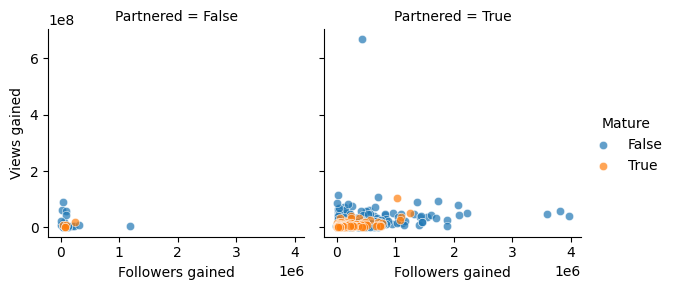

In [27]:
data = data.explode('Followers gained')
data['Followers gained'] = data['Followers gained'].astype('float')
data = data.explode('Views gained')
data['Views gained'] = data['Views gained'].astype('float')
g = sns.FacetGrid(data, col="Partnered", hue="Mature")
g.map(sns.scatterplot, "Followers gained", "Views gained", alpha=.7)
g.add_legend()

## Deteccion de datos ausentes

In [28]:
data.isnull()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

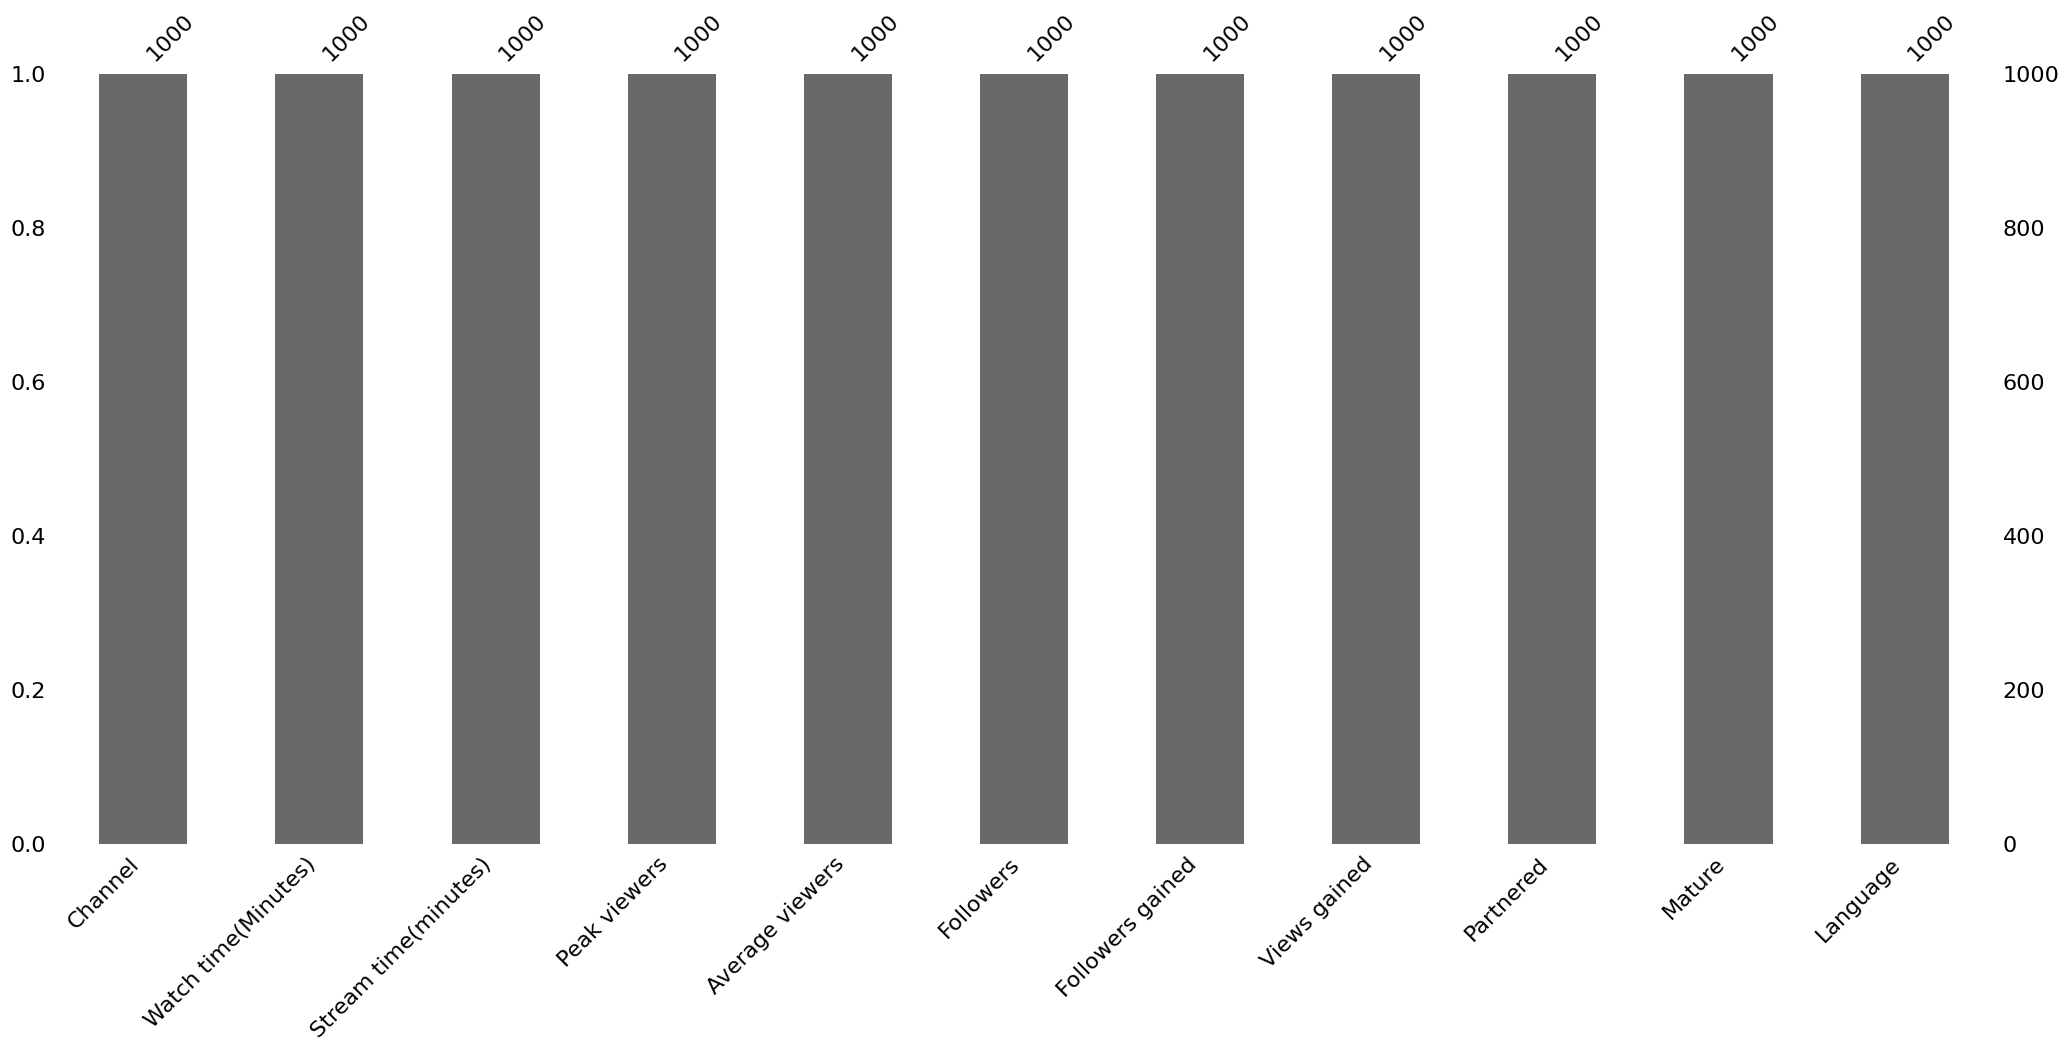

In [30]:
msno.bar(data)

- Conclusion: No tenemos datos nulos

## Datos Atipicos

- Vamos a trabajr con el top 50 de streamers

In [31]:
df = data.iloc[:50,:]
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810.0,93036735.0,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184.0,89705964.0,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779.0,102611607.0,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986.0,106546942.0,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424.0,78998587.0,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201.0,61715781.0,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824.0,46084211.0,True,False,English
7,Fextralife,3301867485,147885,68795,18985,508816,425468.0,670137548.0,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730.0,51349926.0,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689.0,36350662.0,True,False,English


- Vamos a cambian la cantidad de Followers a float

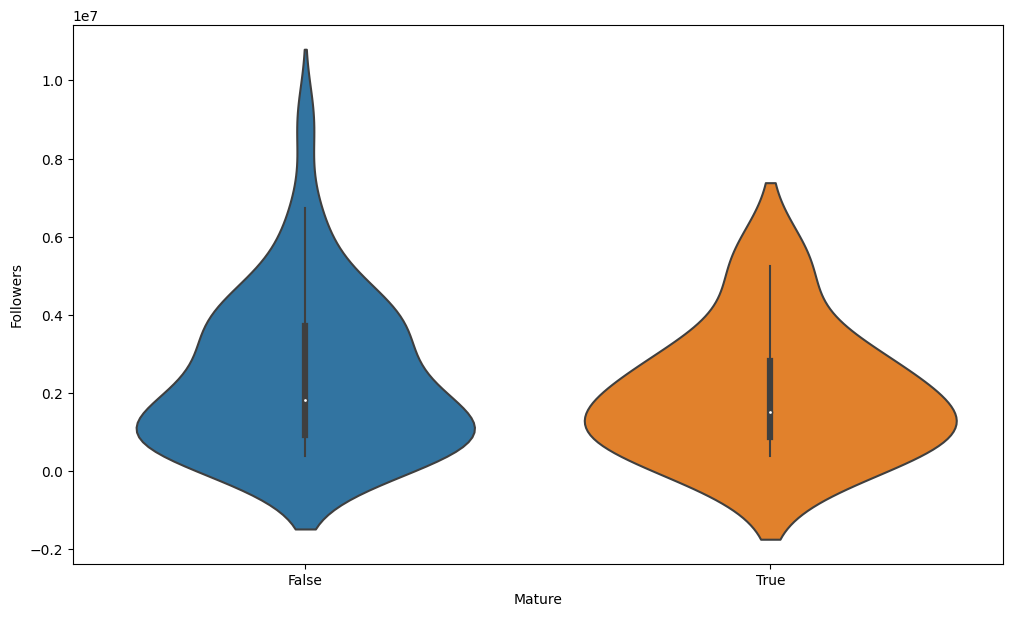

In [32]:
plt.figure(figsize=(12,7))
df = df.explode('Followers')
df['Followers'] = df['Followers'].astype('float')
sns.violinplot(data=df, x="Mature", y="Followers")
plt.show()

- Vamos a ver la distribucion de los datos

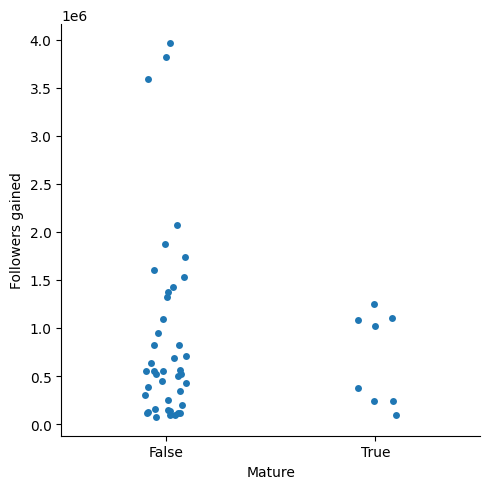

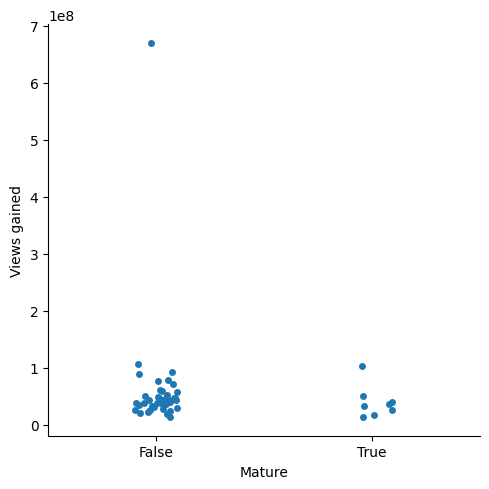

In [33]:
sns.catplot(data=df, x="Mature", y="Followers gained")
sns.catplot(data=df, x="Mature", y="Views gained")

- Conclusiones: No encontramos valores fuera de lugar acogiendo una pequena muestra de los datos

## Analisis de correlacion entre las variables

C:\Users\gabri\AppData\Local\Temp\ipykernel_14072\1029088449.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['Channel', 'Followers','Followers gained','Views gained','Mature','Language']].corr(), annot = True) #overall correlation between the various columns present in our data


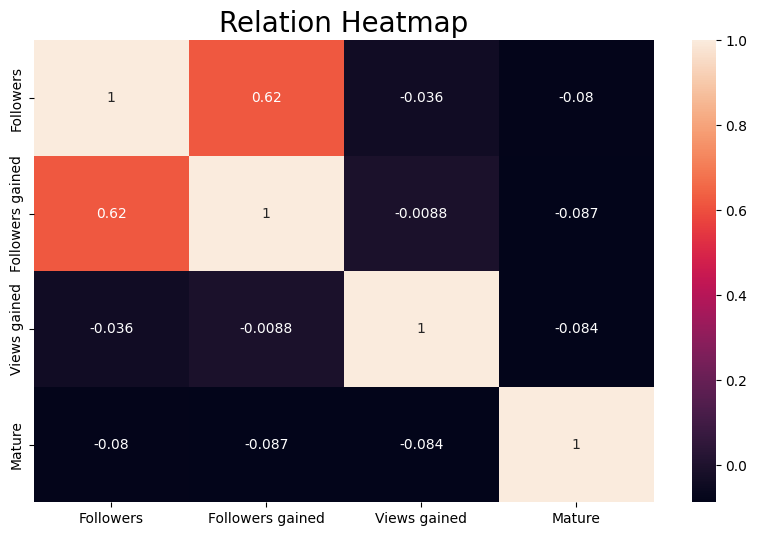

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Channel', 'Followers','Followers gained','Views gained','Mature','Language']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Relation Heatmap', fontsize = 20)
plt.show()

- Conclusiones: Todas las variables poseen una buena correlacion entre si 

## Guardamos los datos en csv despues de procesarlos

In [38]:
df.to_csv('./data_clean/topstreamers.csv')